## Assignment 6: weather

This notebook will take date from https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv. 

The data will the be used to plot the: 

- temperature
- mean temperature each day
- mean temperature for each month  
- Windspeed  
- rolling mean Windspeed per 24-hours
- average monthly mean of the rolling mean Windspeed per 24-hours
- max windspeed for each day  
- monthly mean of the daily max windspeeds 

In [18]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
relevant_column_names = ['date', 'temp', 'wdsp'] # setting specific columns to be read in to avoid reading entire CSV file
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', usecols=relevant_column_names, skiprows=23, low_memory=False)  # reading in the data from the file and skipping specific rows and setting low_memory to false

In [20]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M',dayfirst=True) # converting the date field to a datetime series
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')  # using 'coerce' to catch errors in the conversion to numeric datatype due to missing data in the csv file for this column
#print(df.dtypes)

df.set_index('date', inplace=True) # setting the date as the index

## Temperature over time
***

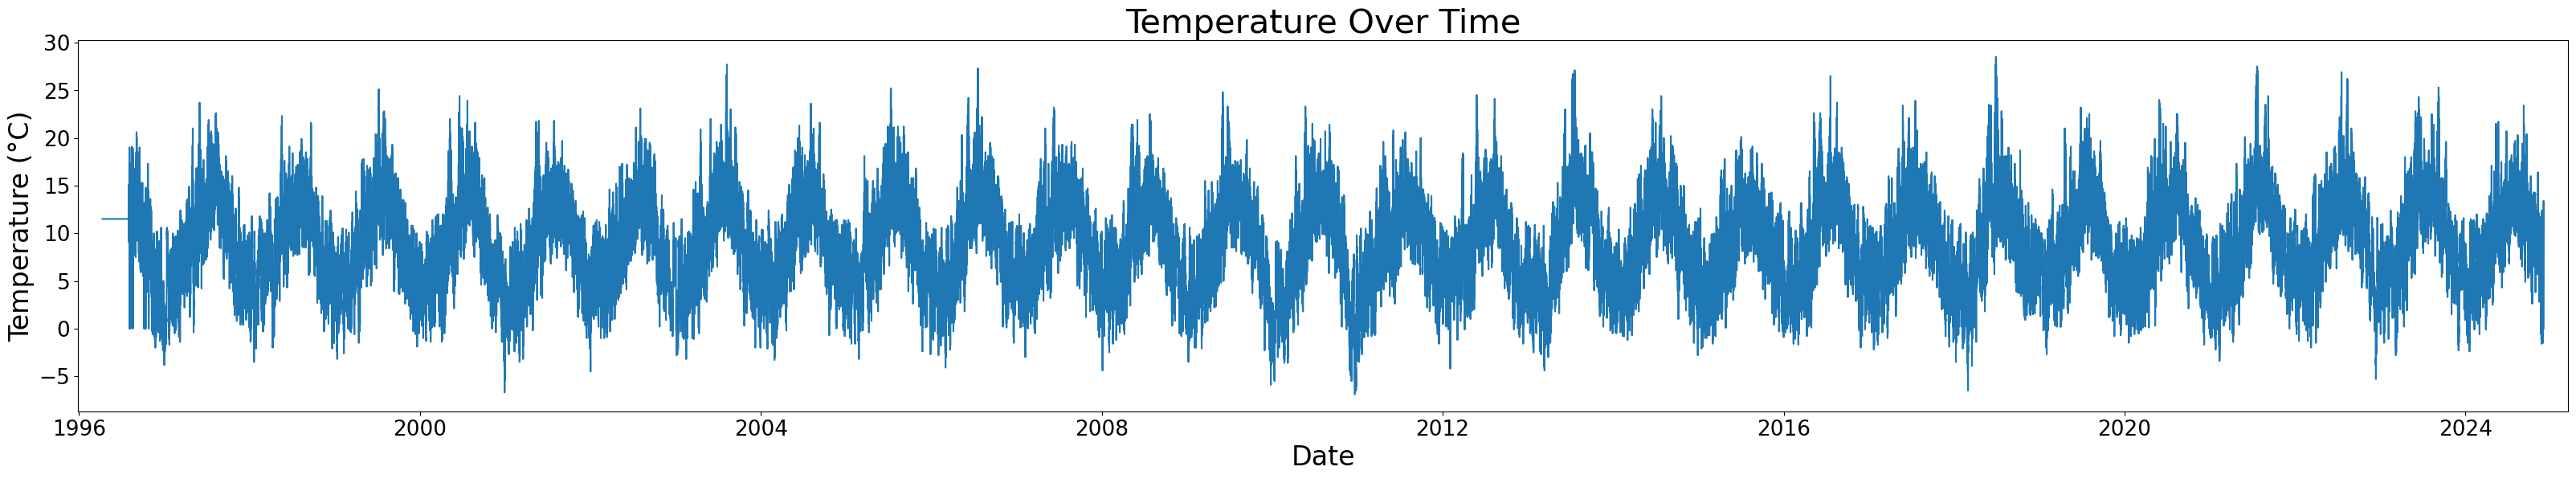

In [21]:
# plotting the temperature information as a line plot
plt.figure(figsize=(40, 6))
sns.lineplot(data=df, x='date', y='temp')
plt.title('Temperature Over Time', fontsize=30)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Temperature (°C)', fontsize=24)
plt.margins(x=0.01)
plt.tick_params(axis='both', labelsize=19) 
plt.show()

## Mean temperature per day
***

In [22]:
rs = df.resample('1D')  # resampling the dataset to daily frequency
rs_mean_day = rs.mean()  # using ``mean`` aggregation for numeric columns
rs_mean_day = rs_mean_day[rs_mean_day['temp'].notna()] # removing rows where 'temp' is NaN

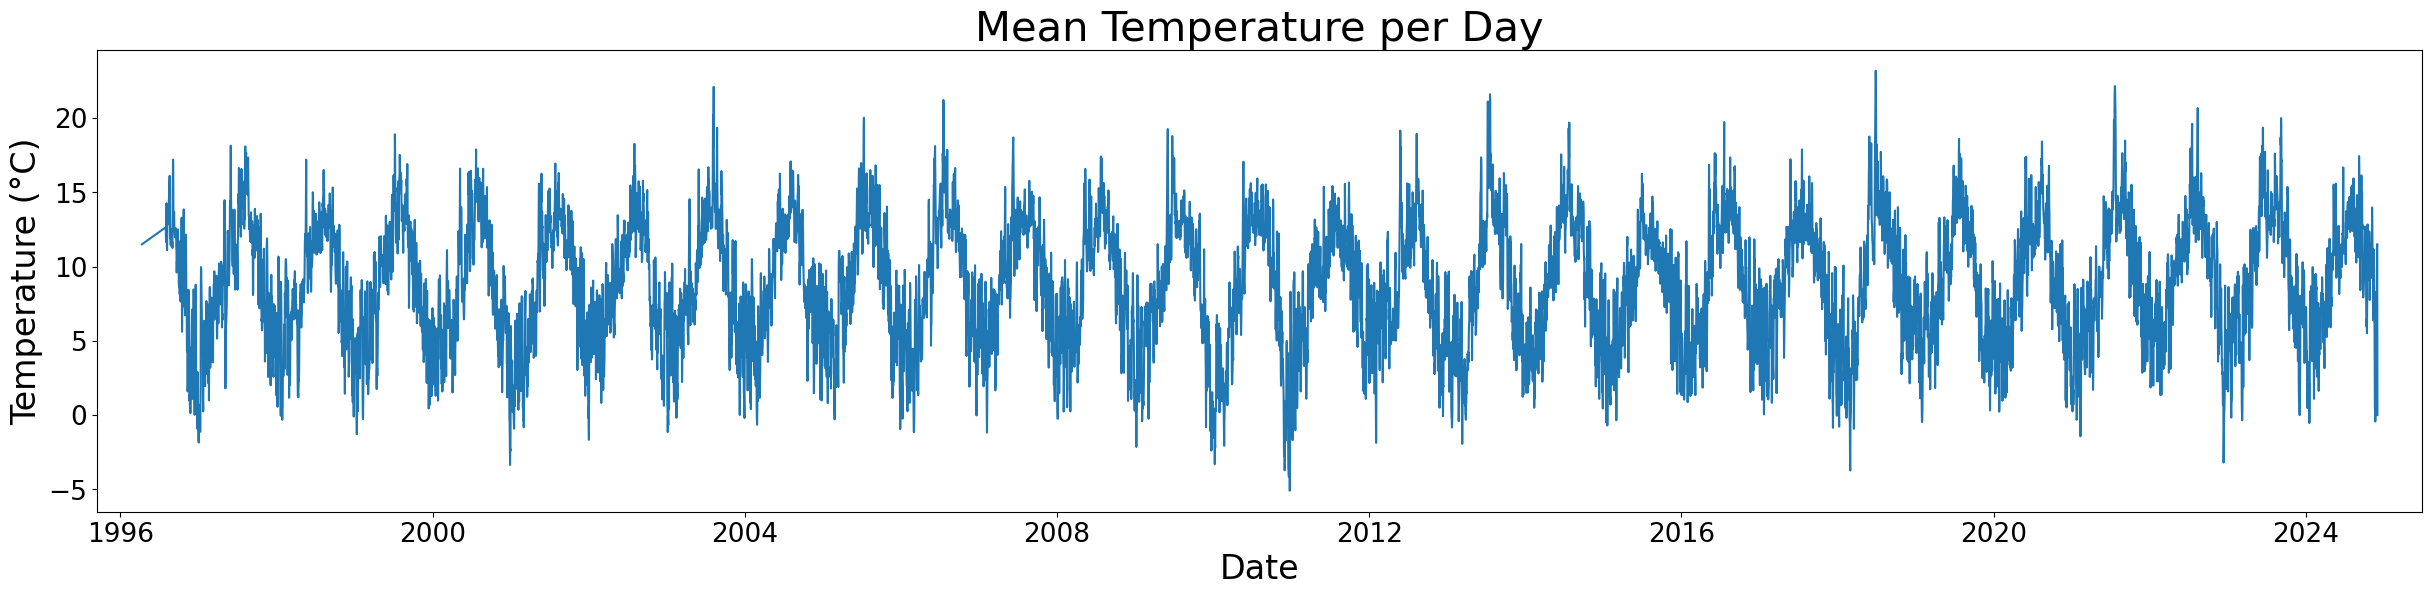

In [ ]:
# plotting mean temperature per day as a line plot
plt.figure(figsize=(30, 6))  
sns.lineplot(data=rs_mean_day, x='date', y='temp')
plt.title('Mean Temperature per Day', fontsize=30)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Temperature (°C)', fontsize=24)
plt.tick_params(axis='both', labelsize=19) 
plt.margins(x=0.02)
plt.show()

## Mean temperature per month
***

In [24]:
rs_month = df.resample('1ME')  # resampling the dataset to monthly frequency
rs_mean_month = rs_month.mean()  # getting the mean for the numeric columns
rs_mean_month = rs_mean_month[rs_mean_month['temp'].notna()] # removing rows where 'temp' is NaN

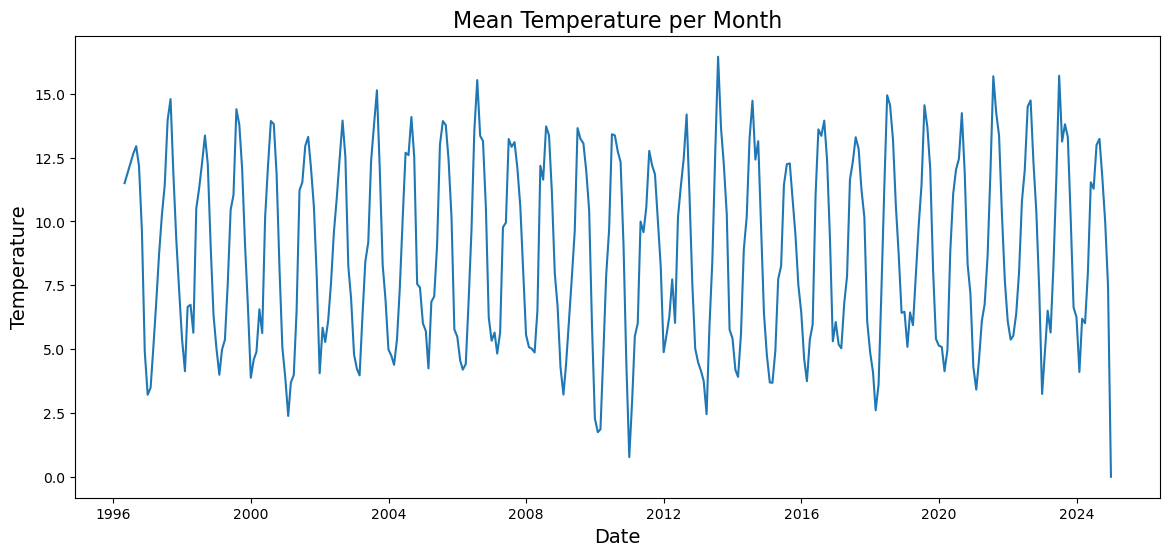

In [ ]:
# plotting mean temperature per month as a line plot
plt.figure(figsize=(14, 6))  
sns.lineplot(data=rs_mean_month, x='date', y='temp')
plt.title('Mean Temperature per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.show()

## Windspeed
***

In [26]:
# checking if there is blank cells in the data
no_of_blanks_in_wdsp = df['wdsp'].isna().sum()

print(f'There are {no_of_blanks_in_wdsp} blank values in the Windspeed column.') # printing initial amount of blank values in the column

# cleaning the data by dropping rows in the df that have a blank value in the Windspeed(wdsp) column
df = df[df['wdsp'].notna()]

# checking if there is blank cells in the data
no_of_blanks_in_wdsp2 = df['wdsp'].isna().sum()
print(f'After cleaning the data, there are {no_of_blanks_in_wdsp2} blank values in the Windspeed column.') # printing the amount of blank entries in the windspeed column after cleaning to confirm they have been dropped

There are 50 blank values in the Windspeed column.
After cleaning the data, there are 0 blank values in the Windspeed column.


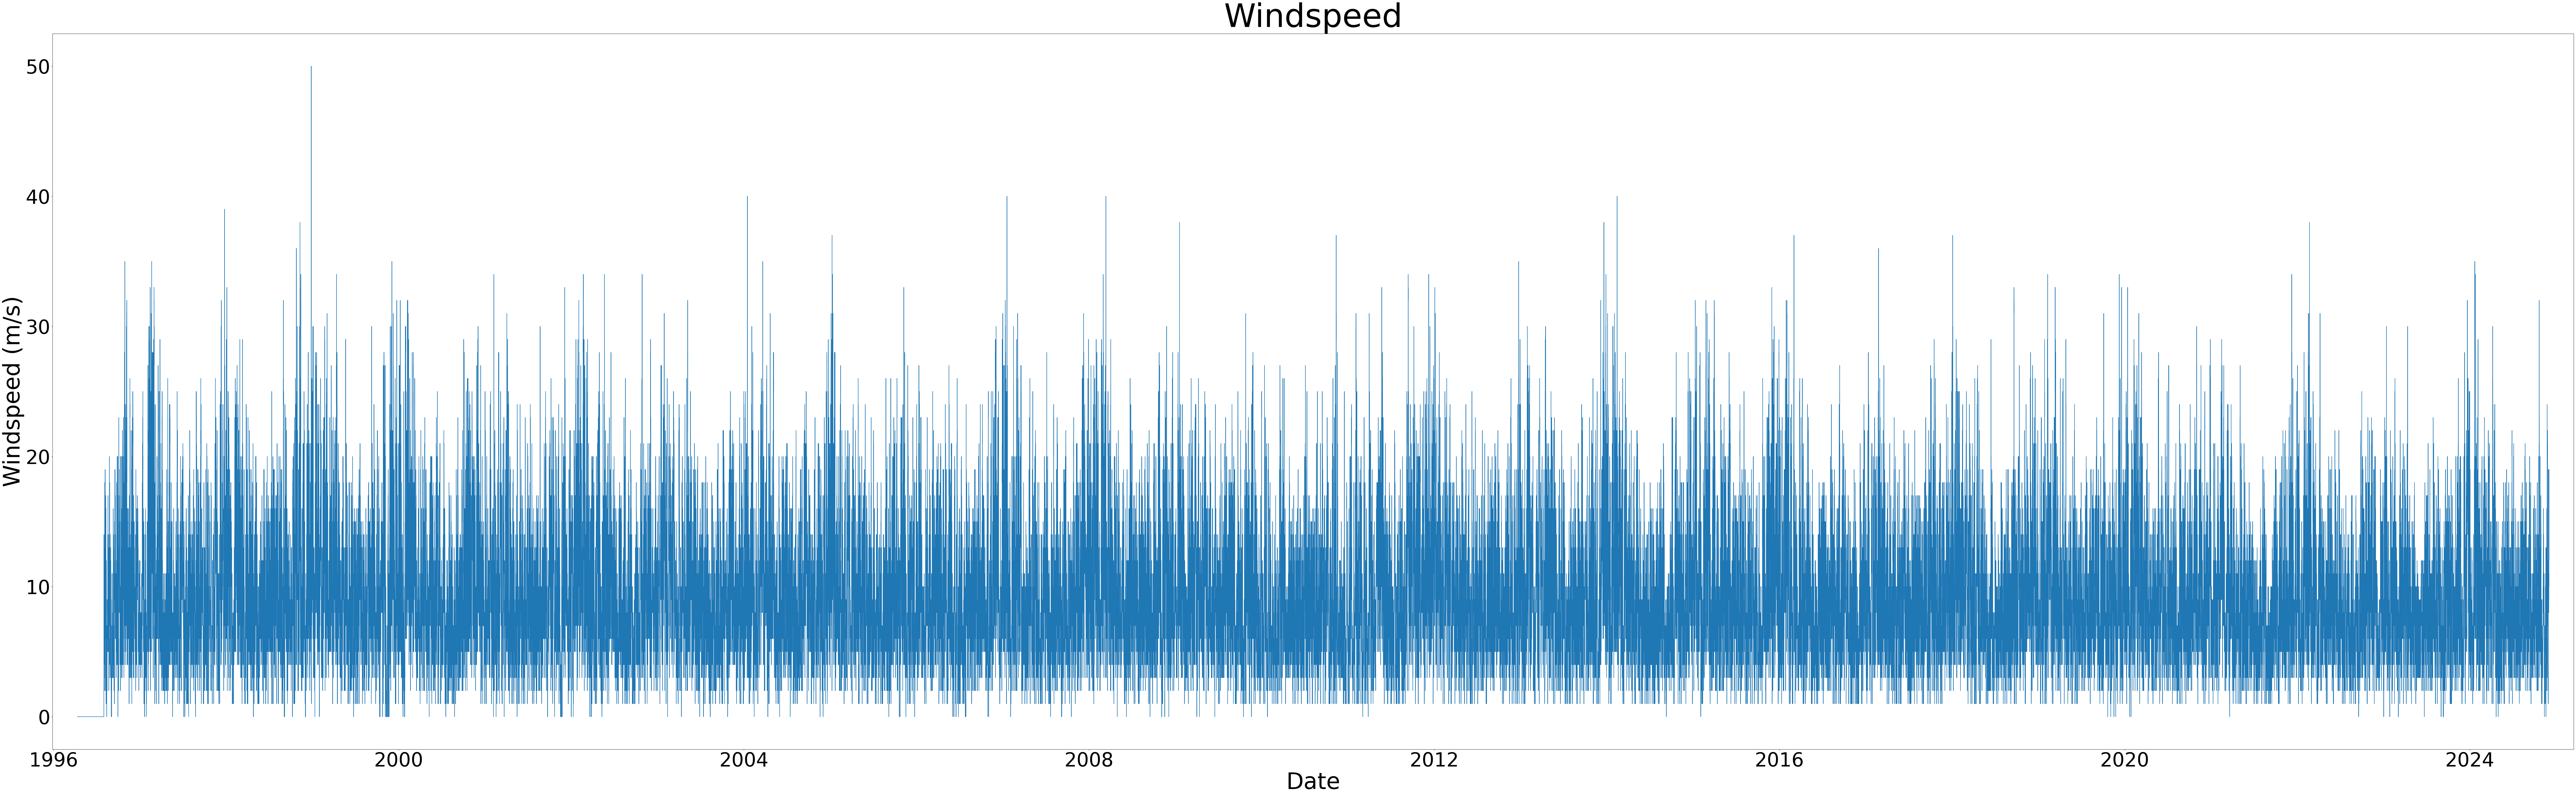

In [27]:
# plotting the data for windspeed
plt.figure(figsize=(140, 40)) # increasing the figure size so that the plot can be easier read due to the large amount of data in the dataset to plot
sns.lineplot(data=df, x='date', y='wdsp')
plt.title('Windspeed', fontsize=100)
plt.xlabel('Date', fontsize=70)
plt.ylabel('Windspeed (m/s)', fontsize=70)
plt.tick_params(axis='both', labelsize=60) # increasing the size of the label values on the x and y axis since the size of the figure is increased
plt.margins(x=0.01)  # shortening the buffer around the x-axis using margins to keep the x parameters around 3% around the max and min

## Rolling average windspeed per 24 hours interval
***
Plotting the rolling mean for the windspeed at 24h intervals for the entire dataset.  
This provides a sense of the general wind conditions over the past day.

In [28]:
df['wdsp_rolling_24h'] = df['wdsp'].rolling(window='24h').mean() # creating a column storing the number calculated for the mean rolling 24 hour windspeed information 

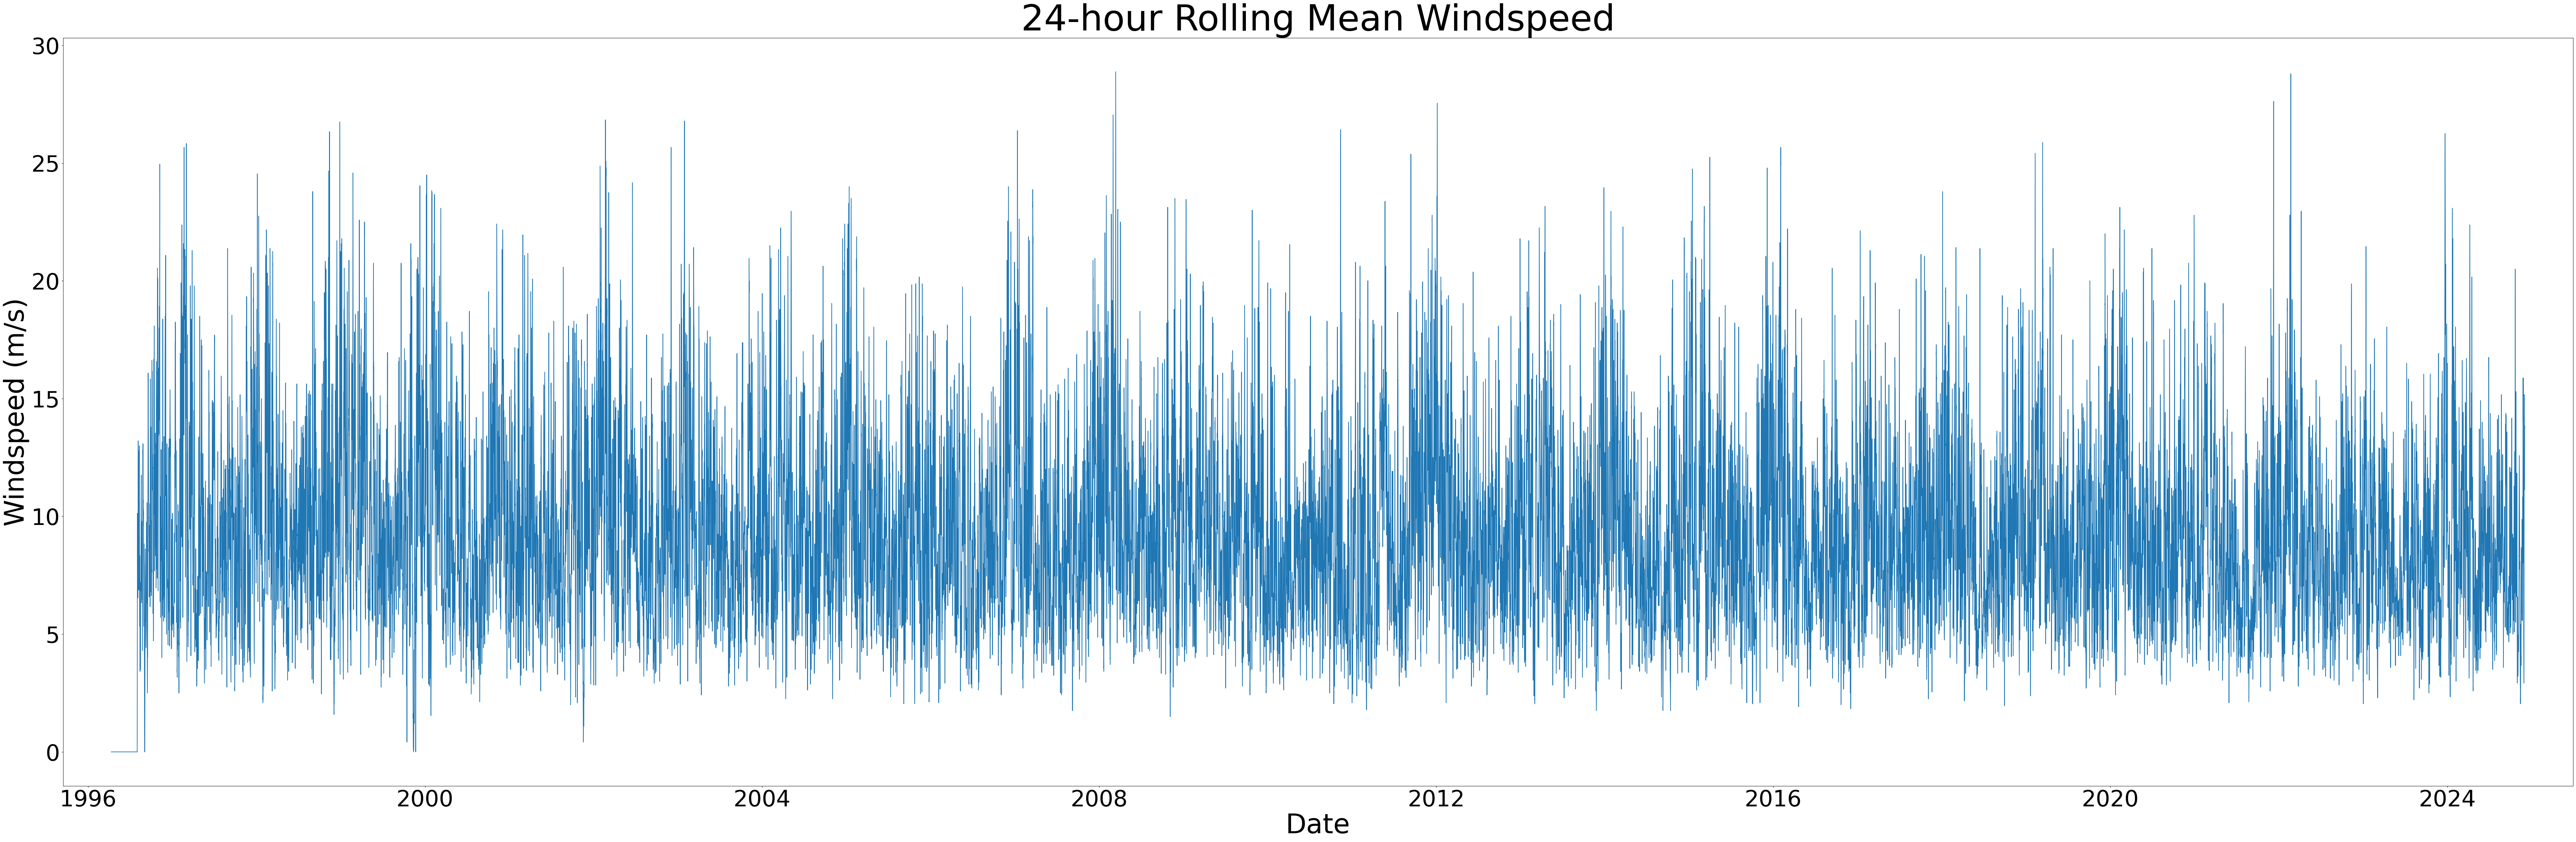

In [29]:
# plotting the rolling 24 hour mean windspeed as a line pint
plt.figure(figsize=(100, 30))
sns.lineplot(x=df.index, y=df['wdsp_rolling_24h'])
plt.title('24-hour Rolling Mean Windspeed', fontsize=80)
plt.xlabel('Date', fontsize=60)
plt.ylabel('Windspeed (m/s)', fontsize=60)
plt.tick_params(axis='both', labelsize=50) 
plt.margins(x=0.02)

## Monthly averages of the 24-hour rolling mean windspeed
***
As the above plot is still quite clutter due to the amount data in the file, next the 24-hour rolling mean Windspeed data will be resampled to monthy intervals to get the monthly mean of the rolling average.

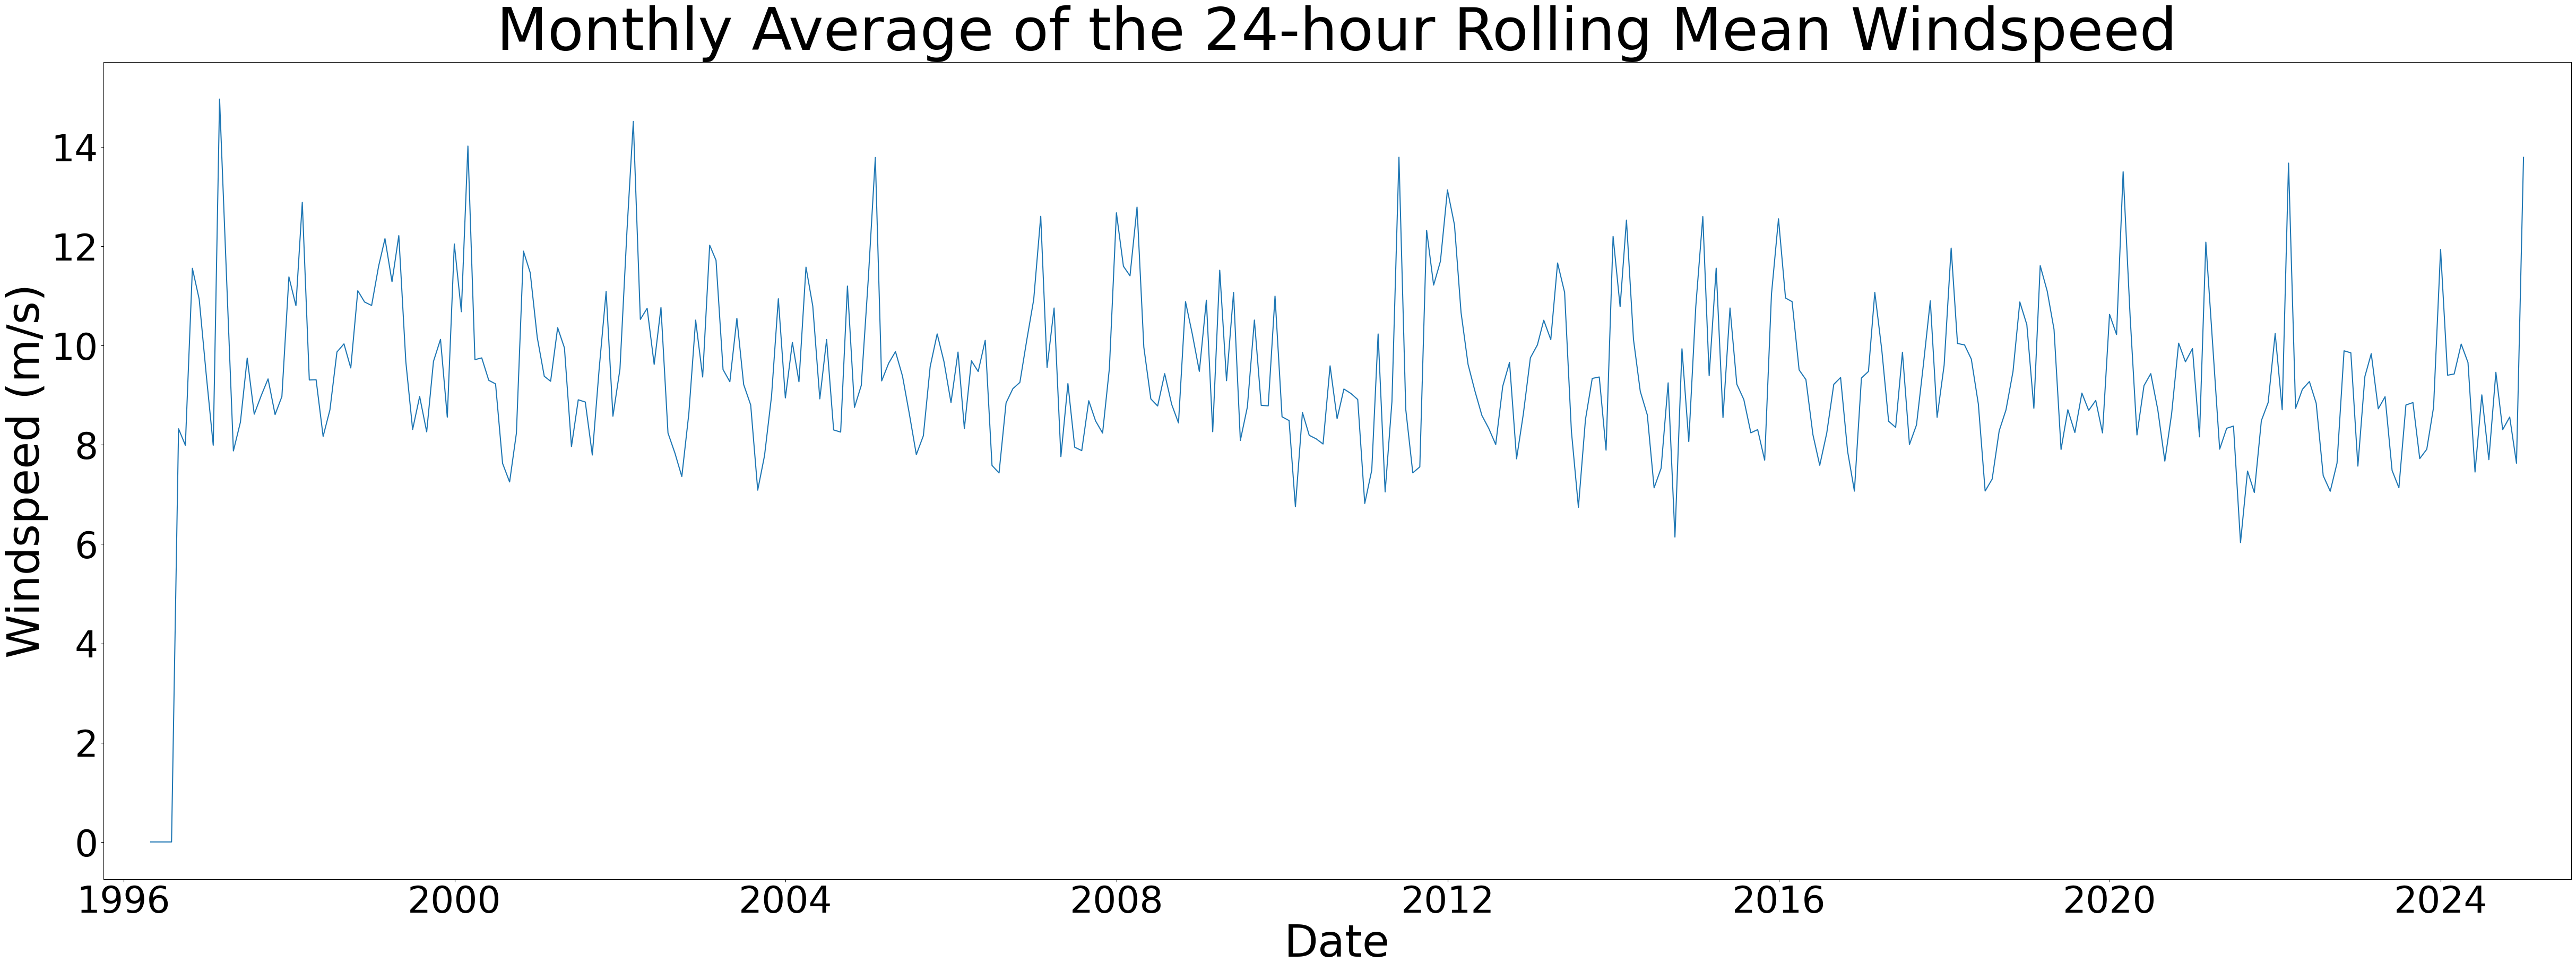

In [30]:
monthly_average_rolling_wdsp = df['wdsp_rolling_24h'].resample('ME').mean() # resampling the mean 24 hour rolling windspeed data as a monthly interval

# plotting the monthly average of the 24 h rolling windspeed
plt.figure(figsize=(60, 20))
sns.lineplot(x=monthly_average_rolling_wdsp.index, y=monthly_average_rolling_wdsp)
plt.title('Monthly Average of the 24-hour Rolling Mean Windspeed', fontsize=80)
plt.xlabel('Date', fontsize=60)
plt.ylabel('Windspeed (m/s)', fontsize=60)
plt.tick_params(axis='both', labelsize=50) 
plt.margins(x=0.02)


## Daily max windspeed
***

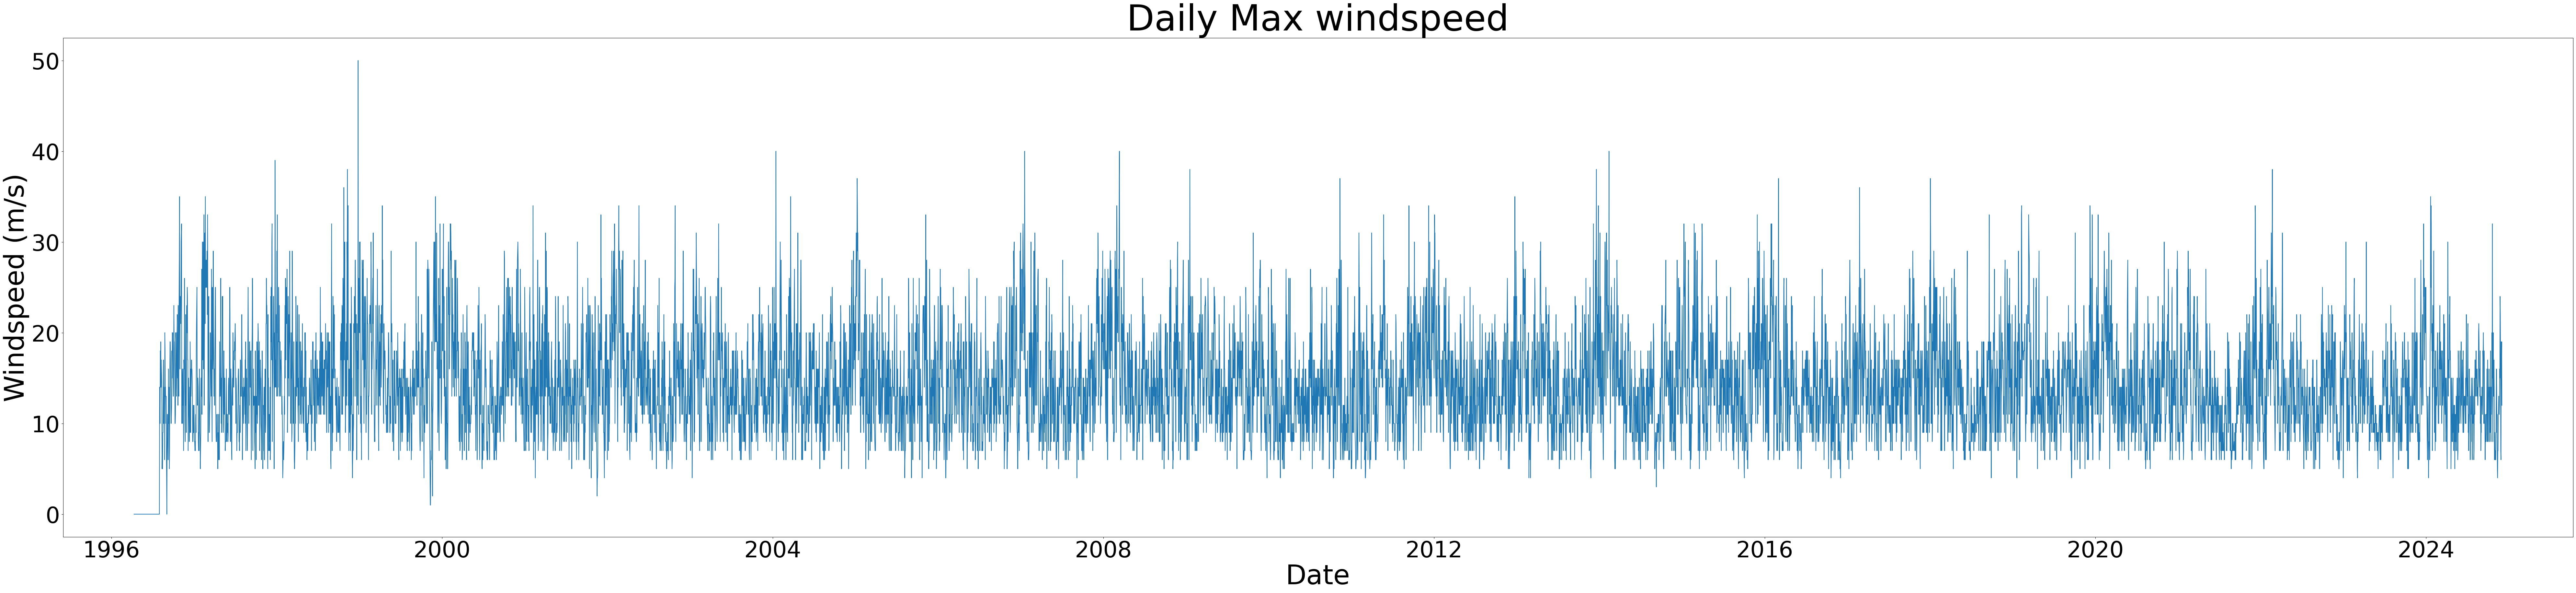

In [31]:
daily_max_wdsp = df['wdsp'].resample('1D').max() # resampling the windspeed data set at daily intervals and picking the max of each day

# plotting the daily max windspeed data
plt.figure(figsize=(100, 20))
sns.lineplot(x=daily_max_wdsp.index, y=daily_max_wdsp)
plt.title('Daily Max windspeed', fontsize=80)
plt.xlabel('Date', fontsize=60)
plt.ylabel('Windspeed (m/s)', fontsize=60)
plt.tick_params(axis='both', labelsize=50) 
plt.margins(x=0.03)


## The monthly mean of the daily max windspeed
***

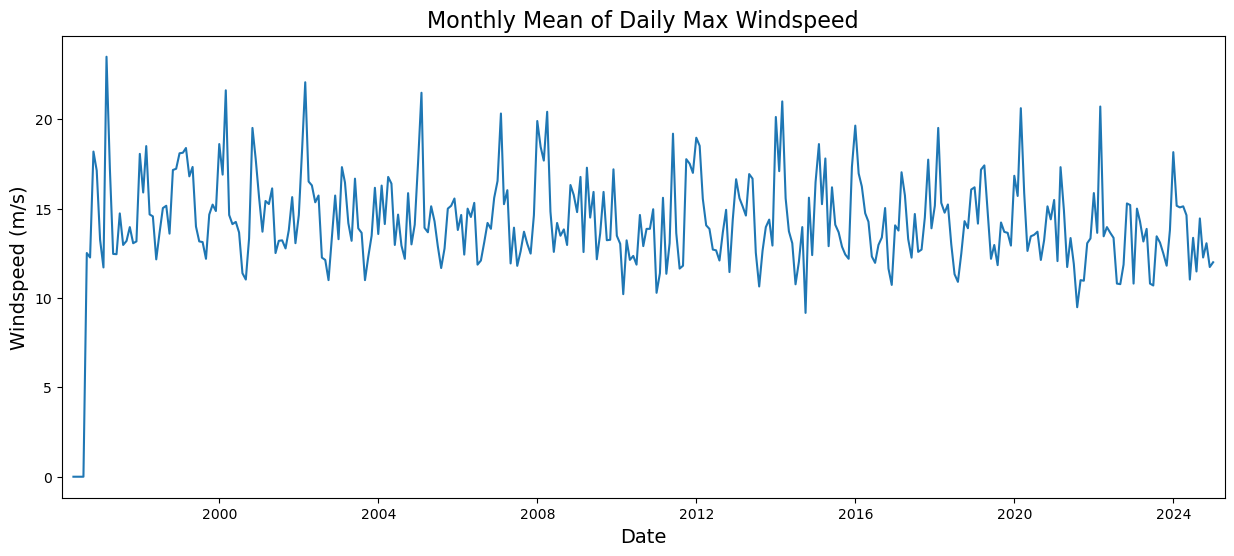

In [32]:
monthly_daily_mean = daily_max_wdsp.resample('ME').mean() # resampling the daily max speed dataset to monthly intervals 

# plotting the monthly mean of the daily max windspeed

plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_daily_mean.index, y=monthly_daily_mean)
plt.title('Monthly Mean of Daily Max Windspeed', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Windspeed (m/s)', fontsize=14)
plt.margins(x=0.01)
